In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from matplotlib import font_manager, rc
from pandas import DataFrame

In [2]:
data = pd.read_csv('03.Brute_Force_attack_sample.csv',warn_bad_lines=False, error_bad_lines=False) #정상 set1.csv 넣기

In [3]:
data

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.method,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control
0,12:17:53,TCP,192.168.10.50,172.16.0.1,21,52108,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12:17:53,FTP,192.168.10.50,172.16.0.1,21,52108,20,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12:17:53,TCP,172.16.0.1,192.168.10.50,52108,21,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12:17:53,TCP,172.16.0.1,192.168.10.50,52108,21,0,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12:17:53,TCP,172.16.0.1,192.168.10.50,52108,21,0,1,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,12:21:06,TCP,192.168.10.50,172.16.0.1,21,52342,0,21,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2981,12:21:06,FTP,192.168.10.50,172.16.0.1,21,52342,34,21,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2982,12:21:06,TCP,192.168.10.50,172.16.0.1,21,52334,0,111,74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2983,12:21:06,TCP,192.168.10.50,172.16.0.1,21,52332,0,111,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


74 74


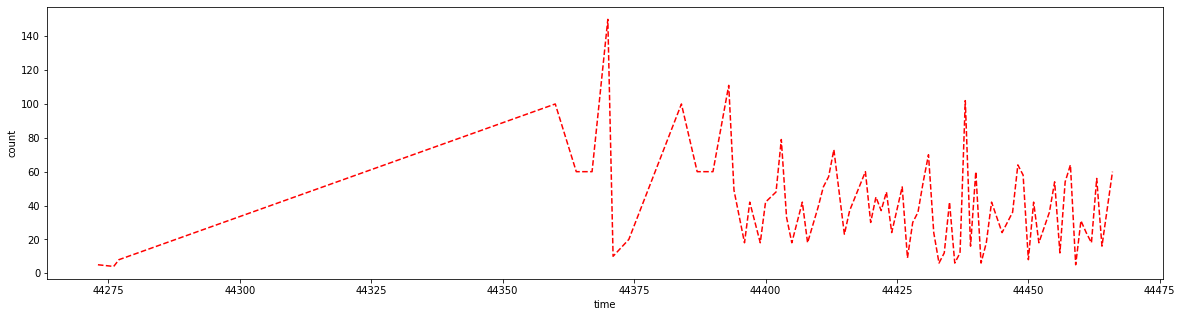

In [4]:

data["seconds"] = round(pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds())
time_set_b = sorted(list(set(data["seconds"])))
result_b = []
for i in range(len(time_set_b)):
    result_b.append(len(data[data["seconds"] == time_set_b[i]]))
print(len(result_b), len(time_set_b))

x = time_set_b
y = result_b
plt.figure(figsize=(20,5))
plt.plot(x,y,'r--')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

In [19]:
train = pd.read_csv('A_train_set1_one_way.csv',warn_bad_lines=False, error_bad_lines=False) #정상 set1.csv 넣기

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,15,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


30 30


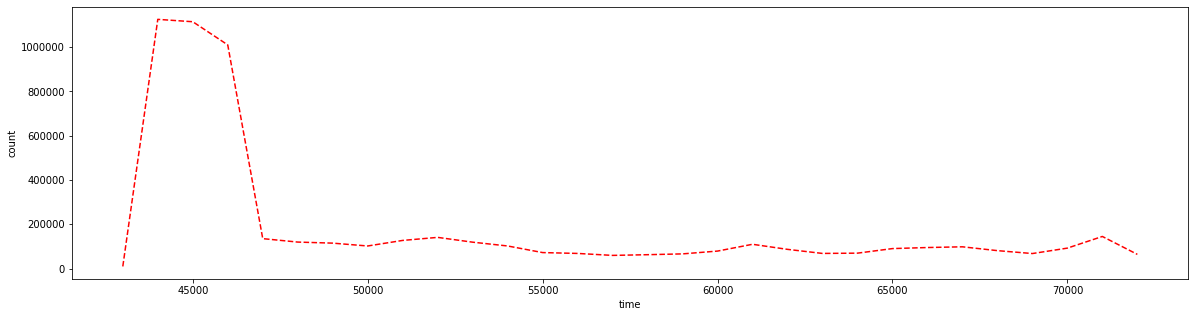

In [20]:

train["seconds"] = round(pd.to_timedelta(train["_ws.col.UTCtime"]).dt.total_seconds(), -3)
time_set_t = sorted(list(set(train["seconds"])))
result_t = []
for i in range(len(time_set_t)):
    result_t.append(len(train[train["seconds"] == time_set_t[i]]))
print(len(result_t), len(time_set_t))

x = time_set_t
y = result_t
plt.figure(figsize=(20,5))
plt.plot(x,y,'r--')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

Text(0.5, 0, 'time')

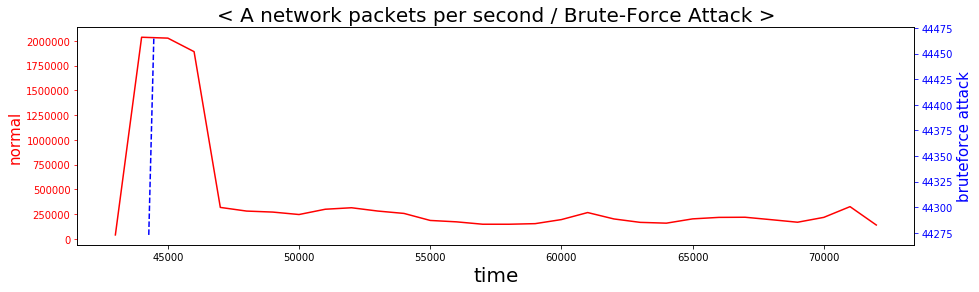

In [18]:
x1 = time_set_t
x2 = time_set_b
y1 = result_t
y2 = time_set_b

plt.figure(figsize=(15, 4))
plt.title('< A network packets per second / Brute-Force Attack >', fontsize=20)
# plt.xlim(40000,55000)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

ax1.plot(x1, y1, color='red', linestyle='-')
ax1.set_ylabel('normal', color='red', fontsize=15)
ax1.tick_params('y', colors='red')

ax2.plot(x2, y2, color='blue', linestyle='--')
ax2.set_ylabel('bruteforce attack', color='blue', fontsize=15)
ax2.tick_params('y', colors='blue')

ax1.set_xlabel("time", fontsize=20)